In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import datetime
import warnings
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
warnings.filterwarnings('ignore')

#Reading data sets from GitHub Gist 
df_train = pd.read_csv('D:/Desktop/School/WPI/DS 504 - Big Data Analytics/Proposal/train_users_2.csv')

#viewing dataset
display(HTML(df_train.head(15).to_html()))

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [24]:
#Deleting unwanted collumns 
del df_train['id' ]
del df_train['signup_flow'] 
del df_train['timestamp_first_active'] 
del df_train['date_account_created']  
del df_train['date_first_booking']

In [25]:
#Removing outliers in age
df_train.age [df_train.age <18 ] = np.nan ; df_train.age [df_train.age >100] = np.nan

In [26]:
#creating bucket for age gap
df_train['Age_Over40'] = (df_train.age >39).map({True:1,False:0})
df_train['Age_30-39'] = ((df_train.age<40) & (df_train.age>30)).map({True:1,False:0})
df_train['Age_Under30'] = (df_train.age <31).map({True:1,False:0})
df_train['Age_unknown'] = (df_train.age.isnull()).map({True:1,False:0})

In [27]:
#Dropping all Nulls 
df_train=df_train.dropna(how='any')

In [28]:
#Reformatting other to unknown
df_train.country_destination [df_train.country_destination=='other'] = ['unknown']
df_train.gender [df_train.gender=='OTHER'] = ['unknown']

In [29]:
#creating dummy variables
df_train3 = pd.get_dummies(df_train, columns=['gender','signup_method', 'language' ,'affiliate_channel', 'affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser'])


In [66]:
#viewing dataset after cleaning
display(HTML(df_train3.head(15).to_html()))

,age,country_destination,Age_Over40,Age_30-39,Age_Under30,Age_unknown,gender_-unknown-,gender_FEMALE,gender_MALE,gender_unknown,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_CoolNovo,first_browser_Firefox,first_browser_IE,first_browser_IE Mobile,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
1,38.0,NDF,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,56.0,US,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.0,unknown,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41.0,US,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,46.0,US,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#Exploratory Analysis

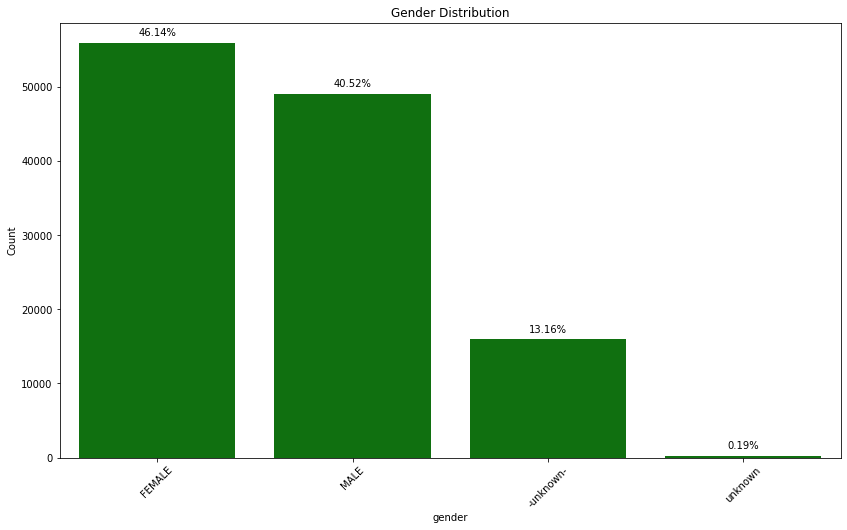

In [30]:
#Viewing Gender Distribution
plt.figure(figsize=(14,8))
sns.countplot(data = df_train, x = df_train['gender'], order = df_train['gender'].value_counts().index, color = 'green'[0])
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=45)


for i in range(df_train['gender'].value_counts().shape[0]):
    count = df_train['gender'].value_counts()[i]
    strt='{:.2f}%'.format(100*count / df_train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

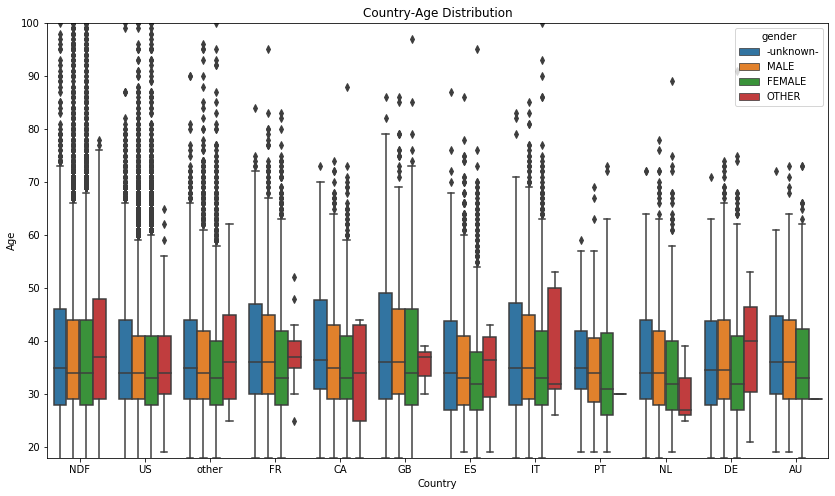

In [10]:
plt.figure(figsize=[14,8])
sns.boxplot(data=df_train,y='age',x='country_destination',hue='gender');
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

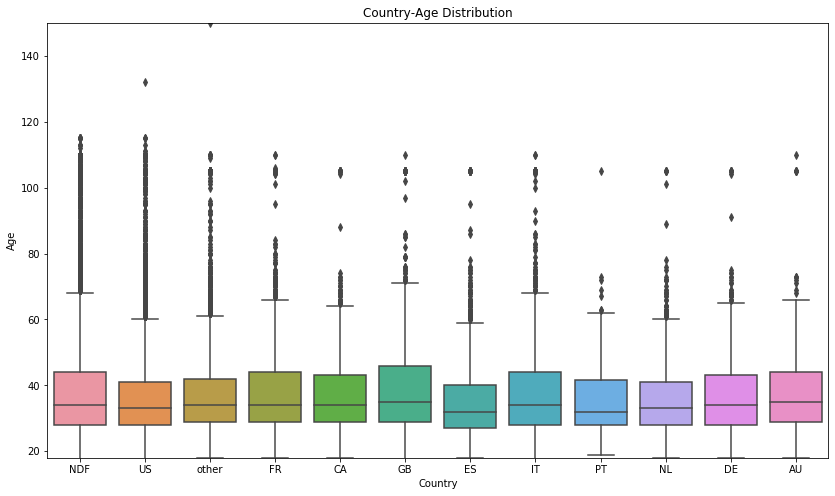

In [11]:
plt.figure(figsize=[14,8])
sns.boxplot(data=df_train,y='age',x='country_destination');
plt.ylim(18,150)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

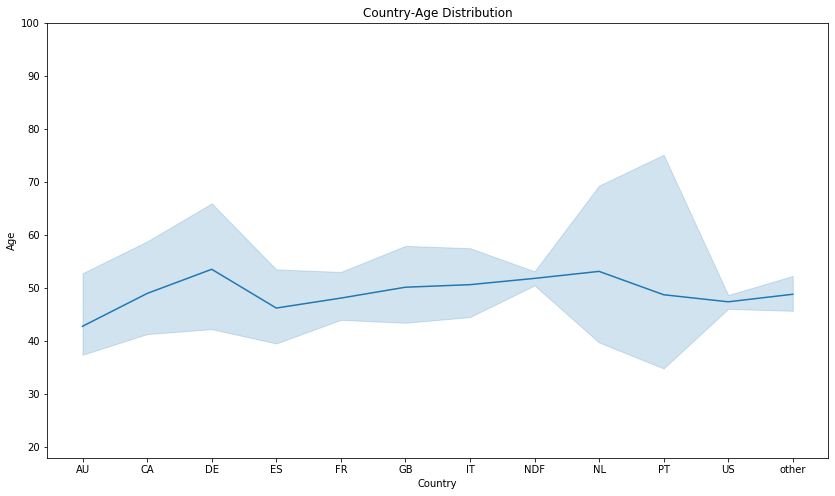

In [12]:
plt.figure(figsize=[14,8])
sns.lineplot(data=df_train,y='age',x='country_destination');
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

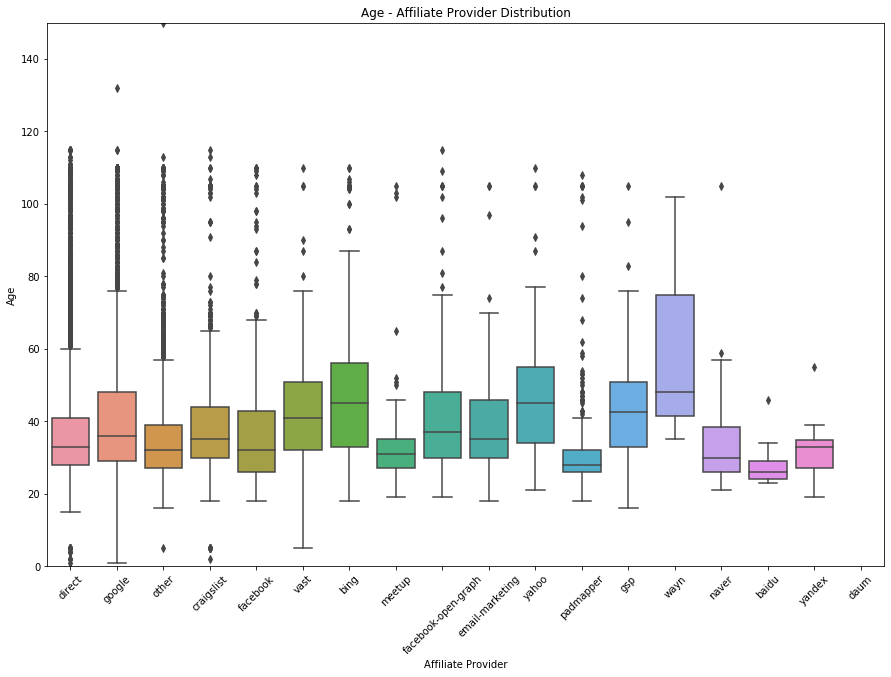

In [17]:
plt.figure(figsize=[15,10])
sns.boxplot(data=df_train,y='age',x='affiliate_provider');
plt.ylim(0,150)
plt.xlabel('Affiliate Provider');
plt.ylabel('Age');
plt.title('Age - Affiliate Provider Distribution');
plt.xticks(rotation=45)

Modeling The Data 

In [31]:
#Modeling The Data 
X_train, X_test, y_train, y_test = train_test_split(df_train3, df_train3['country_destination'], test_size=0.2, random_state=2020, shuffle=True)


#Random forest classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
Rf=RandomForestClassifier(n_estimators=10, random_state=2020)

#fit RF classifier 
Rf.fit(X_train.iloc[:,3:124],y_train)
predsRF = Rf.predict(X_test.iloc[:,3:124])
Rf = (accuracy_score(y_test,predsRF) ) 
print(round(Rf,2)*100, '% Accuracy')

51.0 % Accuracy


In [65]:
confmatRf = metrics.confusion_matrix(y_test, predsRF)
print(confmatRf)

[[   0    0    0    1    0    0    0   37    1    0   50    0]
 [   0    0    0    0    0    1    0   80    0    0  107    2]
 [   0    0    2    0    0    0    0   79    0    0  107    0]
 [   0    2    0    1    2    1    0  144    0    0  184    1]
 [   0    1    1    0    3    0    1  306    0    1  427    4]
 [   1    0    1    0    0    0    1  151    0    0  178    0]
 [   0    0    0    0    0    3    1  167    1    0  225    1]
 [   3    8    6   12   18    9   13 7104    6    1 3740   47]
 [   0    0    1    0    0    0    0   56    0    0   69    1]
 [   0    0    0    0    0    0    0   16    0    0   17    1]
 [   1    8    5    7   25    7   11 3998    5    1 5241   52]
 [   1    0    0    1    4    0    4  592    0    0  825    8]]


In [39]:
#Gather Feature Importance & selection 
featureImportance = pd.DataFrame(Rf.feature_importances_,df_train3.columns[3:124], columns=['Feature Importance']).sort_values(["Feature Importance"],ascending=False)
round(featureImportance,2).head(20)

,Feature Importance
signup_method_facebook,0.12
signup_method_basic,0.09
Age_Under30,0.07
Age_30-39,0.06
gender_FEMALE,0.03
gender_MALE,0.03
first_affiliate_tracked_untracked,0.03
first_affiliate_tracked_linked,0.03
gender_-unknown-,0.03
first_browser_Chrome,0.02


In [44]:
#Optimize the Random Forest model
#use only the top 20 features
X_trainrf,X_testrf,y_trainrf,y_testrf = train_test_split(df_train3.loc[:,list(featureImportance[:124].index)] ,df_train3['country_destination'],test_size=0.20,random_state=2023)
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier  
Rf2 = RandomForestClassifier()
Rf2 .fit(X_trainrf,y_trainrf)
Rf2preds = Rf2 .predict(X_testrf)

#the new accuracy score is 42.07% and has no improvement in the model
Rf2 = (accuracy_score(y_testrf,Rf2preds) )
print(round(Rf2,2)*100, '% Accuracy')

51.0 % Accuracy


In [63]:
confmatRf2 = metrics.confusion_matrix(y_test, Rf2preds)
print(confmatRf2)

[[   0    0    0    0    1    0    0   50    0    0   38    0]
 [   0    0    0    1    0    0    0  105    0    0   81    3]
 [   0    0    0    0    0    1    1   94    0    0   91    1]
 [   0    0    0    0    1    0    0  166    0    0  166    2]
 [   0    0    0    0    0    0    1  385    0    0  356    2]
 [   0    0    0    1    1    0    0  171    0    0  159    0]
 [   0    1    0    0    0    0    0  208    0    0  185    4]
 [   1    4    5    6   19    6    8 5846    2    0 5023   47]
 [   0    0    0    0    0    1    0   65    0    0   61    0]
 [   0    1    0    0    0    0    0   16    0    0   17    0]
 [   0    5    4    7   10    3    8 4925    3    0 4350   46]
 [   0    1    1    0    6    3    1  771    0    0  644    8]]


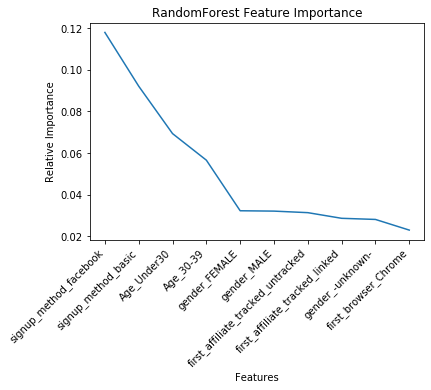

In [46]:
#Random Forest Top Feature Importance plotted 
plt.title('RandomForest Feature Importance') 
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha = 'right')
plt.plot(featureImportance [0:10])

Bernouilli Naive Bayes Classifier

In [47]:
# importing Bernouilli Naive Bayes Classifier 
from sklearn.naive_bayes import BernoulliNB
#Generate predictions using Naive Bayes
NB = BernoulliNB()
NB.fit(X_train.iloc[:,2:124],y_train)
predsNB = NB.predict(X_test.iloc[:,2:124])
#NB accuracy score is 52.98
NB = accuracy_score(y_test,predsNB)
print(round(NB,2)*100, '% Accuracy')

53.0 % Accuracy


In [61]:
confmatNB = metrics.confusion_matrix(y_test, predsNB)
print(confmatNB)

[[   0    0    0    0    0    0    0   32    0    0   57    0]
 [   0    0    0    0    0    0    0   79    0    0  111    0]
 [   0    0    0    0    0    0    0   75    0    0  113    0]
 [   0    0    0    0    0    0    0  134    0    0  201    0]
 [   0    0    0    0    0    0    0  281    0    0  463    0]
 [   0    0    0    0    0    0    0  140    0    0  192    0]
 [   0    0    0    0    0    0    0  158    0    0  240    0]
 [   0    1    0    0    0    0    1 7213    0    4 3748    0]
 [   0    0    0    0    0    0    0   52    0    0   75    0]
 [   0    0    0    0    0    0    0   14    0    0   20    0]
 [   1    0    0    1    0    0    0 3748    0    2 5609    0]
 [   0    2    1    0    0    0    0  552    0    0  880    0]]


Neural Network Classifier

In [48]:
# importing Neural Network Classifier
from sklearn.neural_network import MLPClassifier
#Prediction for Neural Network
NN = MLPClassifier()
NN.fit(X_train.iloc[:,2:124],y_train)
predsNN = NN.predict(X_test.iloc[:,2:124])
#Accuracy for Neural Network
NN = accuracy_score(y_test,predsNN)
print(round(NN,2)*100, '% Accuracy')

52.0 % Accuracy


In [53]:
confmatNN = metrics.confusion_matrix(y_test, predsNN)
print(confmatNN)

[[   0    0    0    0    0    0    0   34    0    0   55    0]
 [   0    0    0    0    0    0    0   82    0    0  108    0]
 [   0    0    0    0    0    0    0   77    0    0  110    1]
 [   0    0    0    0    0    0    0  145    0    0  190    0]
 [   0    0    0    0    0    0    0  301    0    0  442    1]
 [   0    0    0    0    0    0    0  132    0    0  198    2]
 [   0    0    0    0    0    0    0  170    0    0  226    2]
 [   0    0    0    1    1    0    0 7286    1    0 3666   12]
 [   0    0    0    0    0    0    0   52    0    0   75    0]
 [   0    0    0    0    0    0    0   17    0    0   17    0]
 [   0    0    1    0    0    1    0 3940    0    0 5412    7]
 [   0    0    0    0    0    0    1  586    0    0  847    1]]


K-nearest neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train.iloc[:,2:124],y_train)
predsKNN = KNN.predict(X_test.iloc[:,2:124])
KNN =accuracy_score(y_test,predsKNN)
print(round(KNN,2)*100, '% Accuracy')

42.0 % Accuracy


In [50]:
confmatKNN = metrics.confusion_matrix(y_test, predsKNN)
print(confmatKNN)

[[   0    1    2    4    7    2    0   36    0    0   37    0]
 [   2    5    4    4    7    1    2   89    0    0   71    5]
 [   1    6    2    7   10    2    7   71    0    0   79    3]
 [   3   16    1   10   10    6   11  152    0    0  122    4]
 [   8   23    5   17   28   11   19  320    0    0  298   15]
 [   2   10    3    7   14    8    9  121    0    0  147   11]
 [   5   14    2   11   17    8    9  174    0    0  151    7]
 [  73  249   60  218  415  152  158 6277    2    1 3138  224]
 [   4    3    0    3    2    2    1   59    0    0   50    3]
 [   0    0    0    1    2    2    2   15    0    0   10    2]
 [  59  287   68  259  409  176  198 4011    3    0 3678  213]
 [   6   63   16   38   67   29   34  630    0    0  518   34]]


GradientBoosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier(max_depth=4, random_state=2020, n_estimators=10, verbose=1)
                  
XGB.fit(X_train.iloc[:,2:124],y_train)
predsXGB = XGB.predict(X_test.iloc[:,2:124])
XGB = accuracy_score(y_test,predsXGB)
print(round(XGB,2)*100, '% Accuracy')

      Iter       Train Loss   Remaining Time 
         1      126413.3837           42.32s
         2      125420.1863           39.82s
         3      124694.6212           33.97s
         4      124148.2401           28.83s
         5      123705.3408           24.03s
         6      123361.3495           19.09s
         7      123079.9066           14.25s
         8      122845.1189            9.50s
         9      122665.7815            4.72s
        10      122498.2267            0.00s
53.0 % Accuracy


In [52]:
#Compare All classifiers
pd.DataFrame({'Random Forest': round(Rf2,2)*100 ,'Neural Network': round(NN,2)*100, 'Naive Bayes': round(NB,2)*100, 'KNeighborsClassifier': round(KNN,2)*100 , 'XGBoosting':round(XGB,2)*100 },index=['Model Accuracy'])
 

,Random Forest,Neural Network,Naive Bayes,KNeighborsClassifier,XGBoosting
Model Accuracy,51.0,52.0,53.0,42.0,53.0
